In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load raw data

In [2]:
target_col_idx = 1
y_raw = pd.read_csv(
    'data/profile.txt', 
    sep='\t', 
    usecols=[target_col_idx],
    names=['valve condition'],  
    dtype={target_col_idx: int}) \
    .iloc[:,0]
y_raw

0       100
1       100
2       100
3       100
4       100
       ... 
2200    100
2201    100
2202    100
2203    100
2204    100
Name: valve condition, Length: 2205, dtype: int64

In [3]:
FS1 = pd.read_csv('data/FS1.txt', sep='\t', names=range(1, 601), dtype=float)
FS1

,1,2,3,4,5,6,7,8,9,10,...,591,592,593,594,595,596,597,598,599,600
0,8.990,0.770,0.641,0.006,0.000,0.000,0.001,0.003,0.001,0.001,...,7.743,7.992,7.919,7.773,7.955,7.823,7.963,7.876,7.738,8.036
1,8.919,0.815,0.709,0.009,0.004,0.000,0.001,0.000,0.000,0.001,...,7.831,8.003,7.923,7.745,7.867,7.747,7.969,7.969,7.963,7.890
2,9.179,0.683,0.528,0.008,0.003,0.001,0.003,0.003,0.004,0.006,...,7.862,7.815,7.894,7.743,7.936,7.770,7.982,7.873,7.898,7.952
3,9.034,0.728,0.595,0.009,0.001,0.004,0.003,0.003,0.003,0.001,...,7.631,7.949,7.773,8.054,7.827,8.011,7.919,7.938,7.877,7.773
4,8.729,0.705,0.446,0.014,0.007,0.003,0.001,0.003,0.001,0.000,...,7.771,7.936,7.919,7.946,7.804,7.983,7.838,7.882,7.894,7.825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,8.173,1.024,0.834,0.009,0.000,0.001,0.000,0.003,0.001,0.000,...,7.904,7.777,7.938,7.841,7.741,8.004,7.869,7.719,8.003,7.874
2201,8.317,0.883,0.799,0.008,0.005,0.000,0.000,0.000,0.000,0.001,...,7.766,7.957,7.817,7.739,8.036,7.871,7.647,7.993,7.898,7.787
2202,8.170,0.686,0.583,0.011,0.000,0.003,0.004,0.000,0.000,0.000,...,7.898,7.648,7.953,7.871,7.859,7.921,7.770,7.982,7.859,7.685
2203,8.496,0.543,0.366,0.009,0.005,0.000,0.000,0.000,0.001,0.003,...,7.834,7.737,8.065,7.893,7.653,7.971,7.898,7.758,7.892,7.793


In [4]:
PS2 = pd.read_csv('data/PS2.txt', sep='\t',  names=range(1, 6001),dtype=float)
PS2

,1,2,3,4,5,6,7,8,9,10,...,5991,5992,5993,5994,5995,5996,5997,5998,5999,6000
0,125.50,125.39,125.40,125.03,124.05,123.18,104.01,56.500,23.992,18.406,...,125.02,125.00,125.10,125.09,124.98,124.91,124.98,125.11,125.14,125.10
1,125.06,125.08,125.09,124.69,123.84,123.14,103.63,63.687,28.359,21.711,...,124.80,124.88,125.13,125.22,125.09,124.98,125.06,125.13,125.09,125.04
2,125.13,125.27,125.23,124.74,123.94,123.23,106.35,60.516,26.258,19.258,...,124.61,124.69,124.74,124.71,124.59,124.64,124.74,124.73,124.77,124.88
3,124.93,124.96,124.92,124.41,123.60,122.88,103.99,58.859,27.781,21.469,...,124.82,124.79,124.69,124.69,124.77,124.83,124.69,124.53,124.51,124.59
4,124.72,124.74,124.66,124.31,123.57,122.74,105.94,62.648,30.875,23.883,...,124.80,124.67,124.49,124.56,124.69,124.62,124.45,124.41,124.47,124.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,125.47,125.63,125.70,125.34,124.94,124.88,113.56,71.586,34.516,25.531,...,125.57,125.51,125.38,125.43,125.59,125.61,125.53,125.50,125.60,125.73
2201,125.83,125.70,125.59,125.43,125.18,124.98,114.30,72.531,35.234,26.820,...,125.86,125.77,125.74,125.81,125.77,125.66,125.58,125.58,125.55,125.44
2202,125.41,125.49,125.63,125.38,124.96,124.77,113.69,70.773,32.531,23.773,...,125.66,125.73,125.77,125.81,125.94,126.04,125.98,125.84,125.84,125.94
2203,125.91,125.73,125.59,125.38,125.10,124.96,114.19,74.039,38.695,30.125,...,125.55,125.56,125.58,125.74,125.84,125.73,125.66,125.73,125.86,125.91


# EDA

## Target variable

How does the target var looks like?

<Axes: >

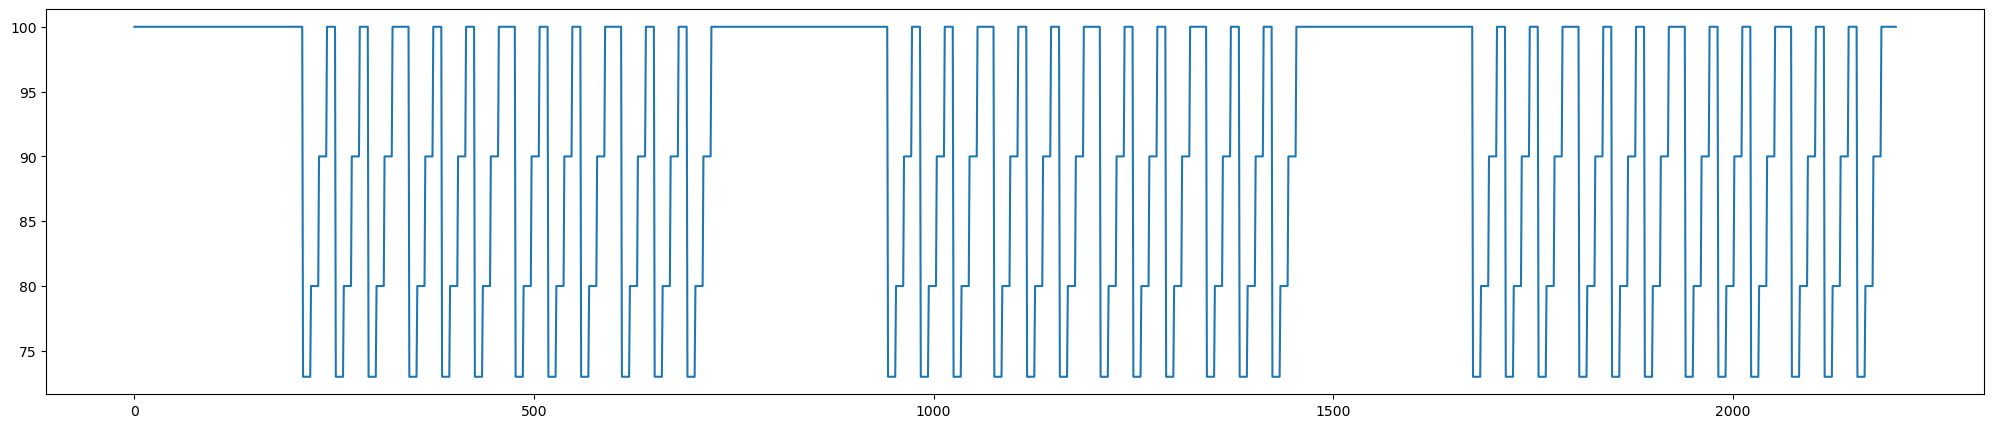

In [104]:
y_raw.plot(figsize=(25,5))

Statistics of the target values:

In [105]:
y_raw.value_counts().to_frame()

,count
valve condition,
100,1125
73,360
80,360
90,360


Since we are interested in predicting valve condition `=100%` or `!=100%` we can binarise this variable:

In [106]:
y = (y_raw - 99).clip(lower=0)
y.value_counts().to_frame()

,count
valve condition,
1,1125
0,1080


The dataset is well balanced.

<Axes: >

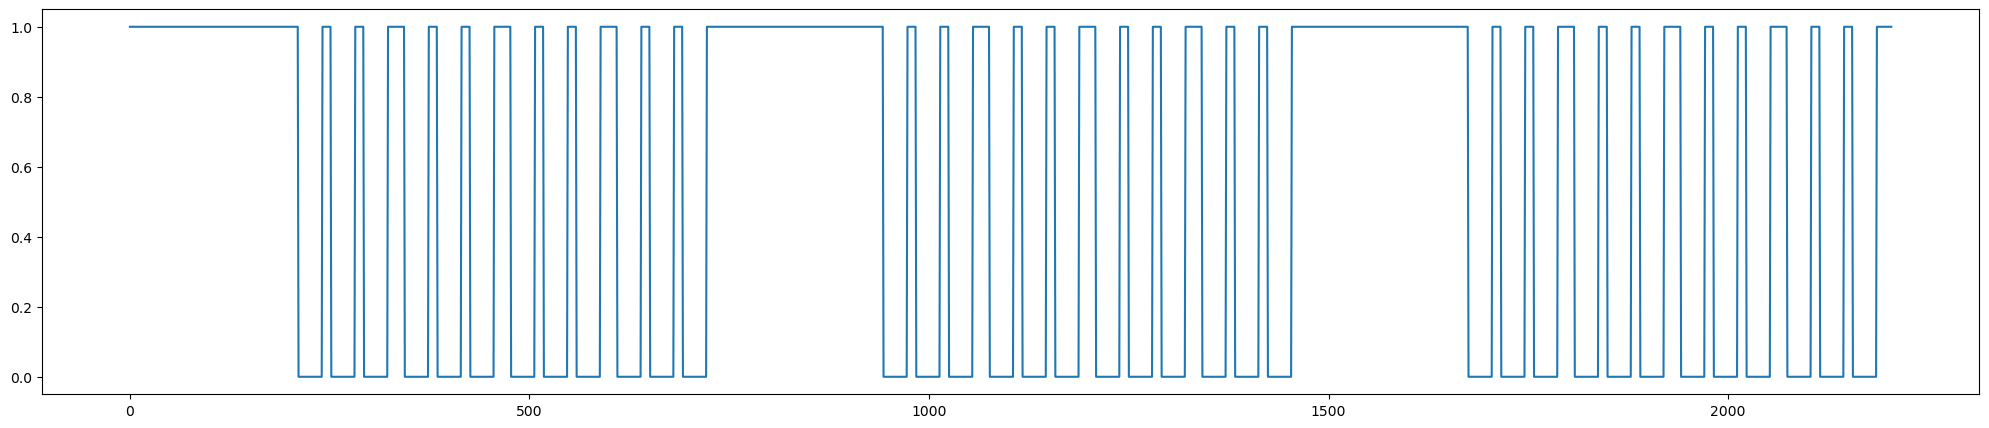

In [12]:
y.plot(figsize=(25,5))

## FS1

A set of 600 features.

The way the data is organised for the moment, each row is a time series lasting 60s at the end of which we obtain some target value.

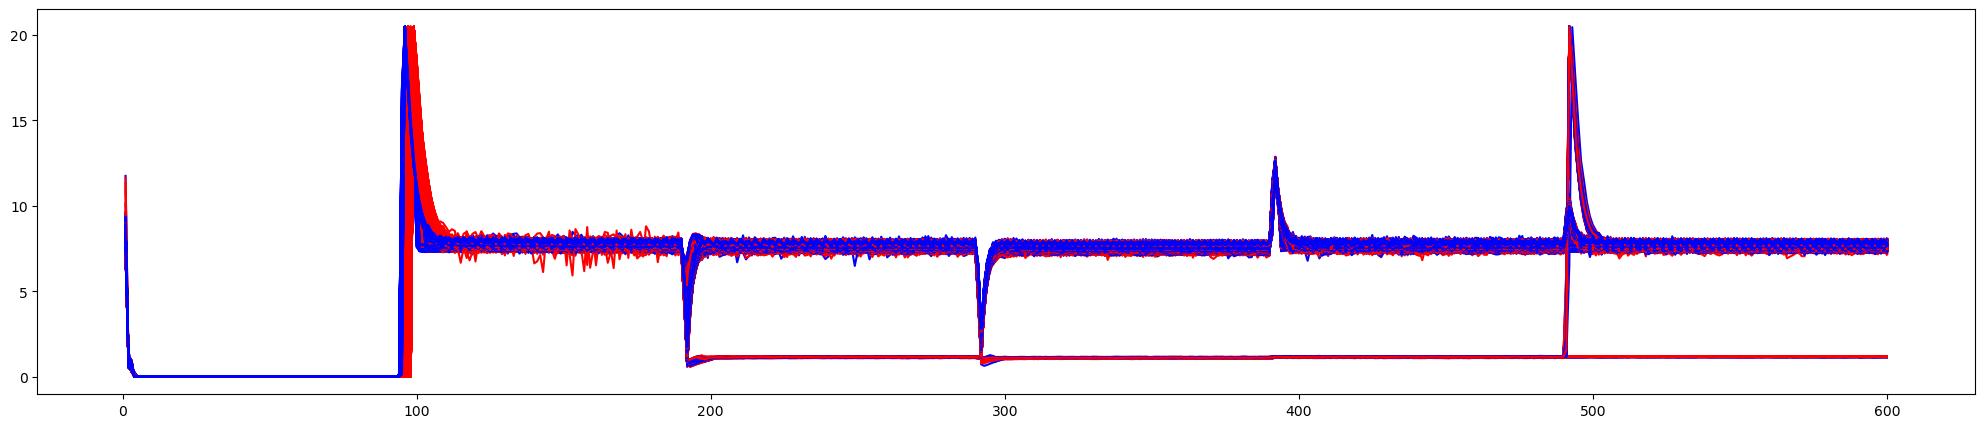

In [114]:
fig, ax = plt.subplots(figsize=(25, 5))
for i, s in FS1.iterrows():
    c = 'r' if y[i] == 0 else 'b'
    ax.plot(s, c=c)

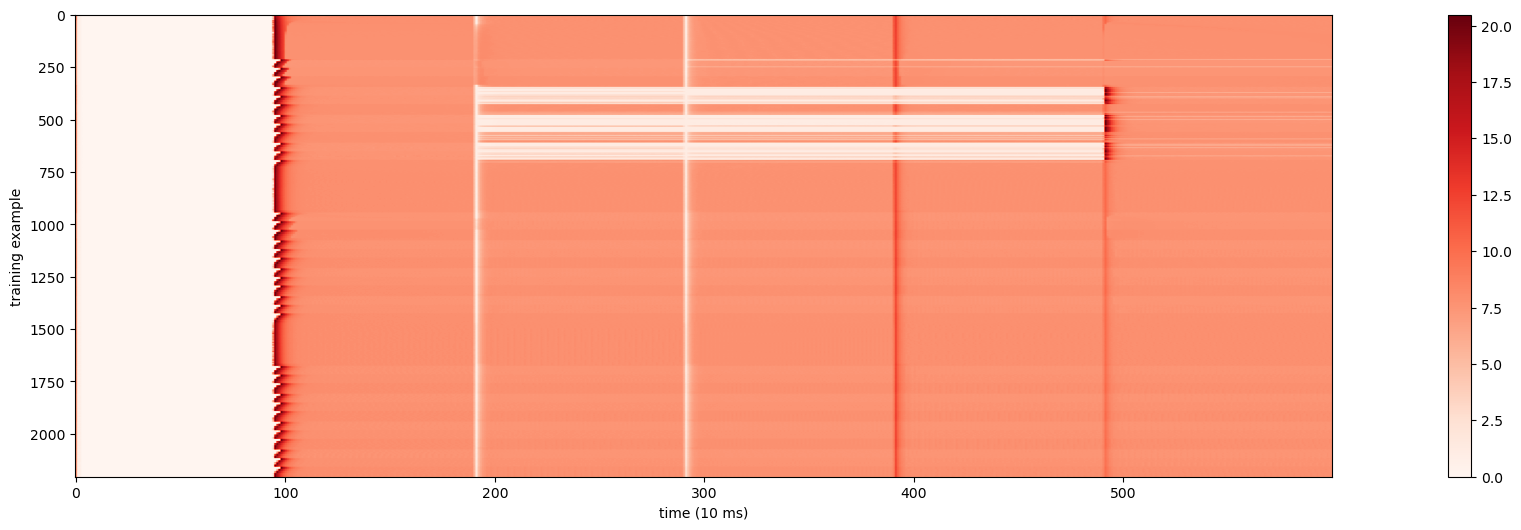

In [110]:
plt.figure(figsize=(30,6))
plt.xlabel('time (10 ms)')
plt.ylabel('training example')
plt.imshow(FS1, cmap='Reds', aspect=0.1) 
plt.colorbar()
plt.show() 

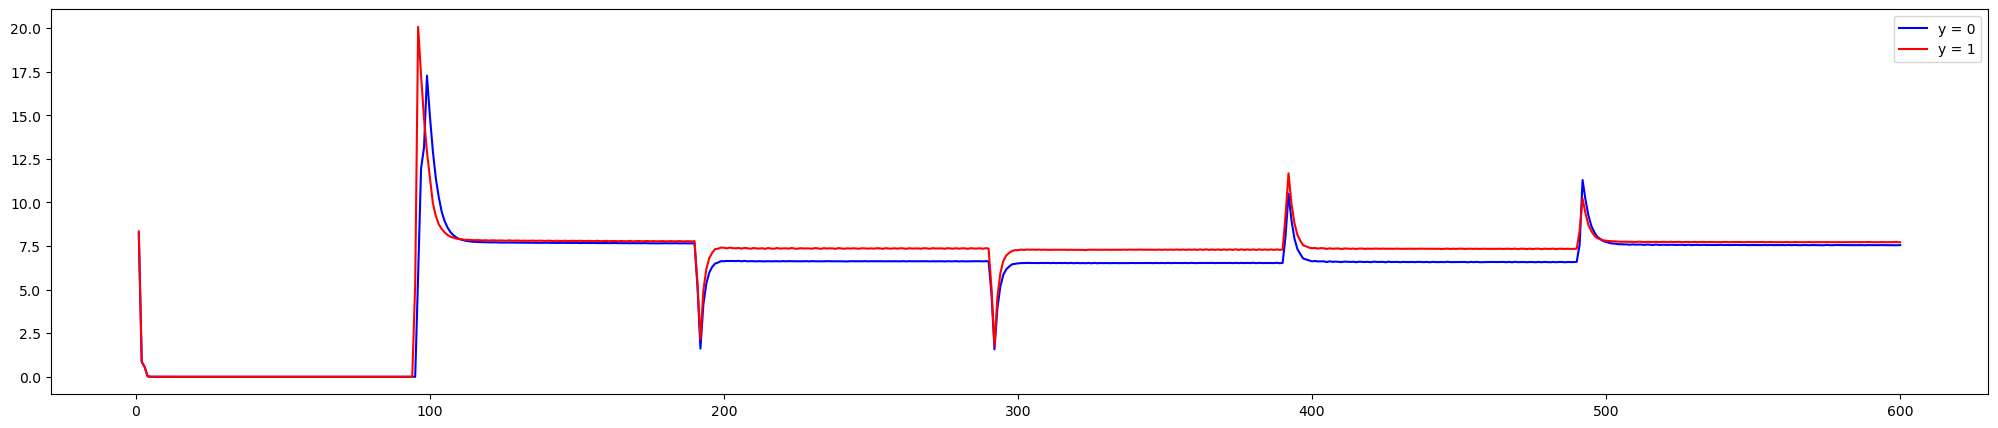

In [ ]:
fig, ax = plt.subplots(figsize=(25, 5))

ax.plot(FS1.loc[y == 0, :].mean(0), c='b', label='y = 0')
ax.plot(FS1.loc[y == 1, :].mean(0), c='r', label='y = 1')

ax.legend()
plt.show()

## PS2

A set of 6000 features.

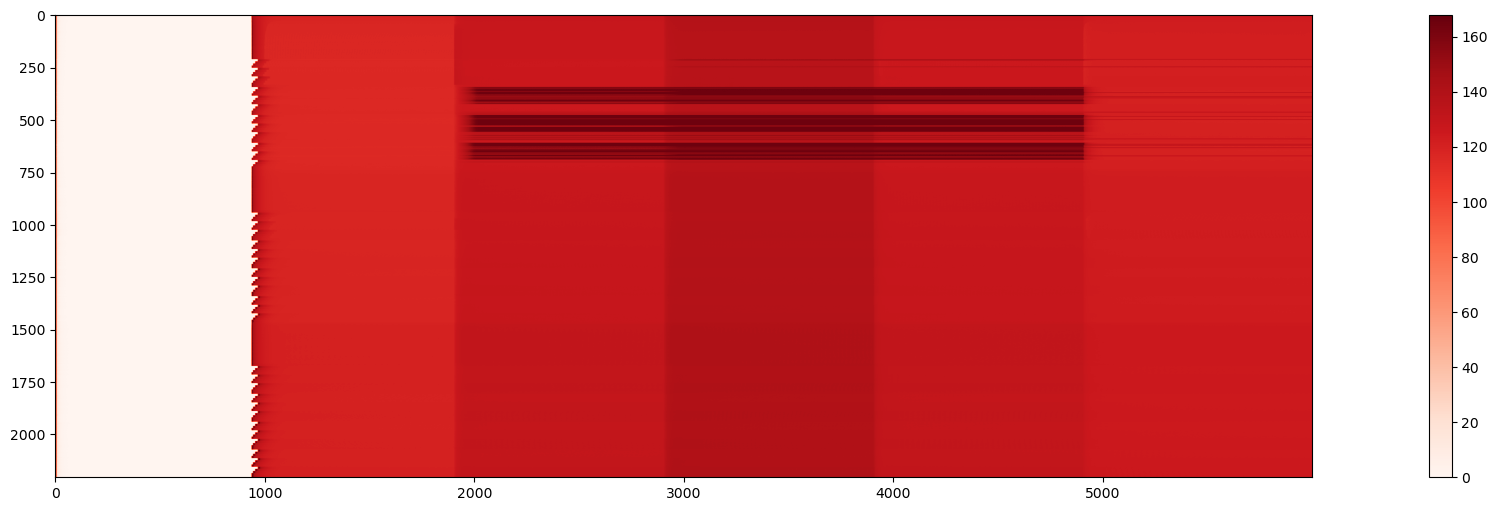

In [13]:
plt.figure(figsize=(30,6))
plt.imshow(PS2, cmap='Reds', aspect=1.) 
plt.colorbar()
plt.show() 

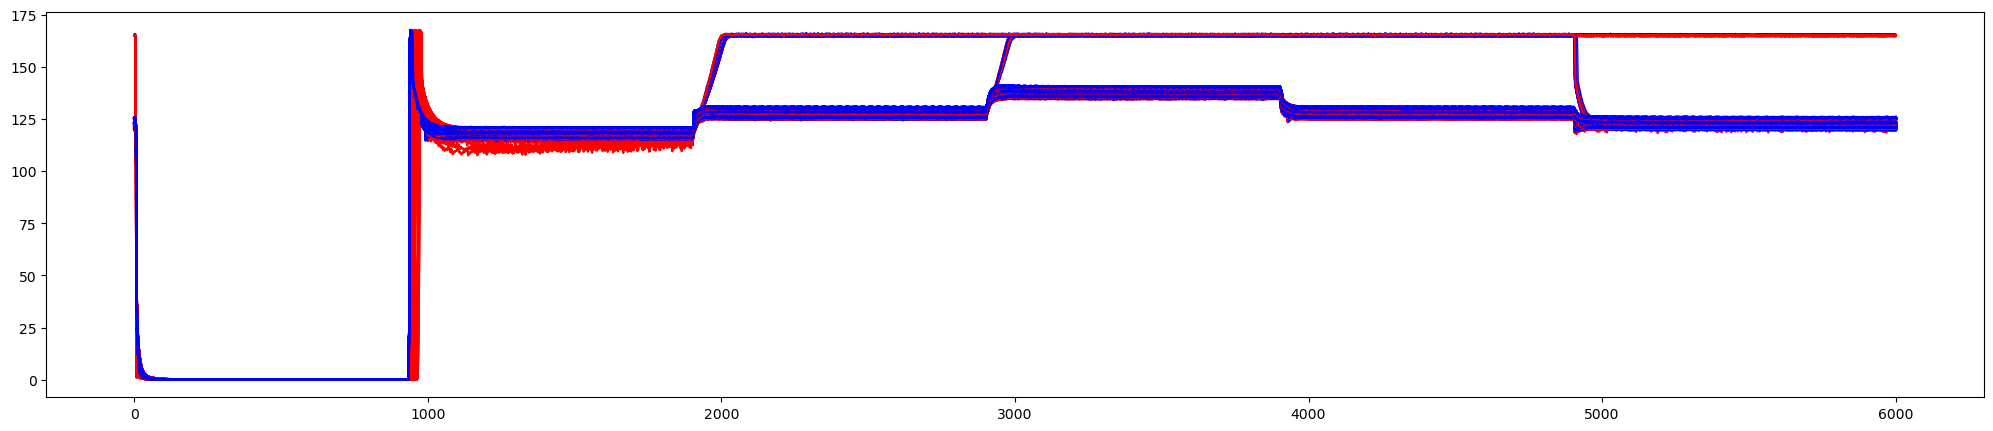

In [ ]:
fig, ax = plt.subplots(figsize=(25, 5))
for i, s in PS2.iterrows():
    c = 'r' if y[i] == 0 else 'b'
    ax.plot(s, c=c)

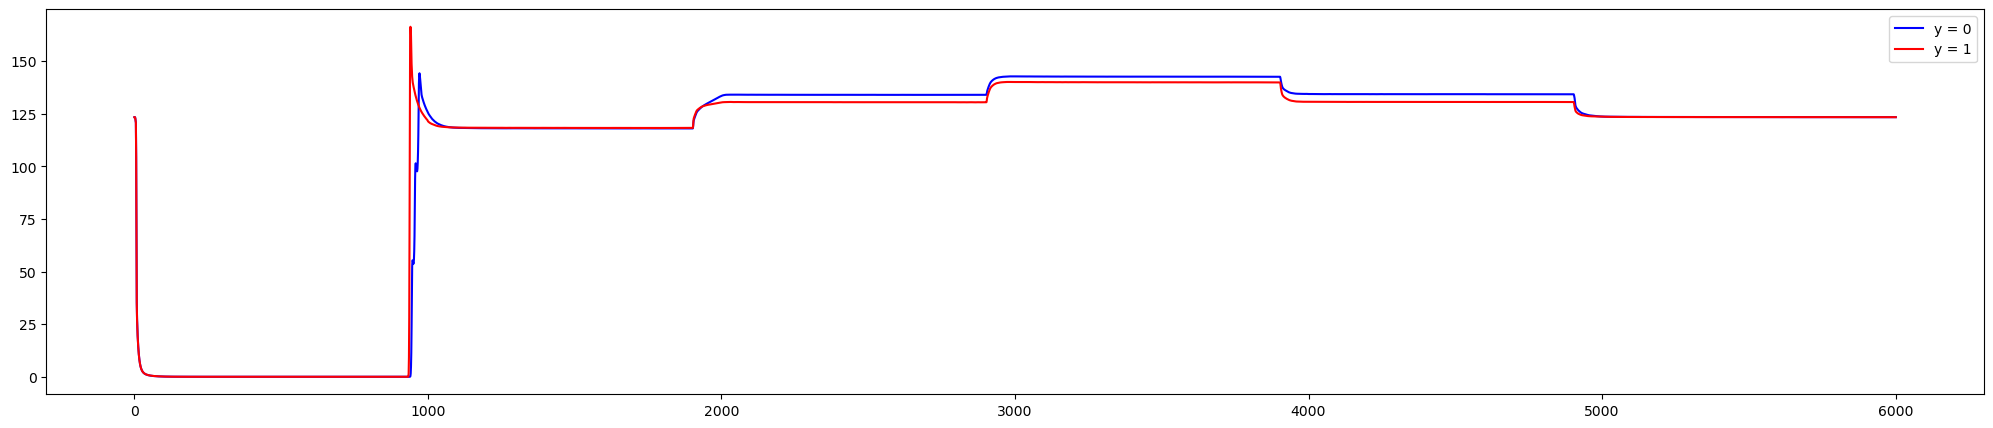

In [ ]:
fig, ax = plt.subplots(figsize=(25, 5))

ax.plot(PS2.loc[y == 0, :].mean(0), c='b', label='y = 0')
ax.plot(PS2.loc[y == 1, :].mean(0), c='r', label='y = 1')

ax.legend()
plt.show()

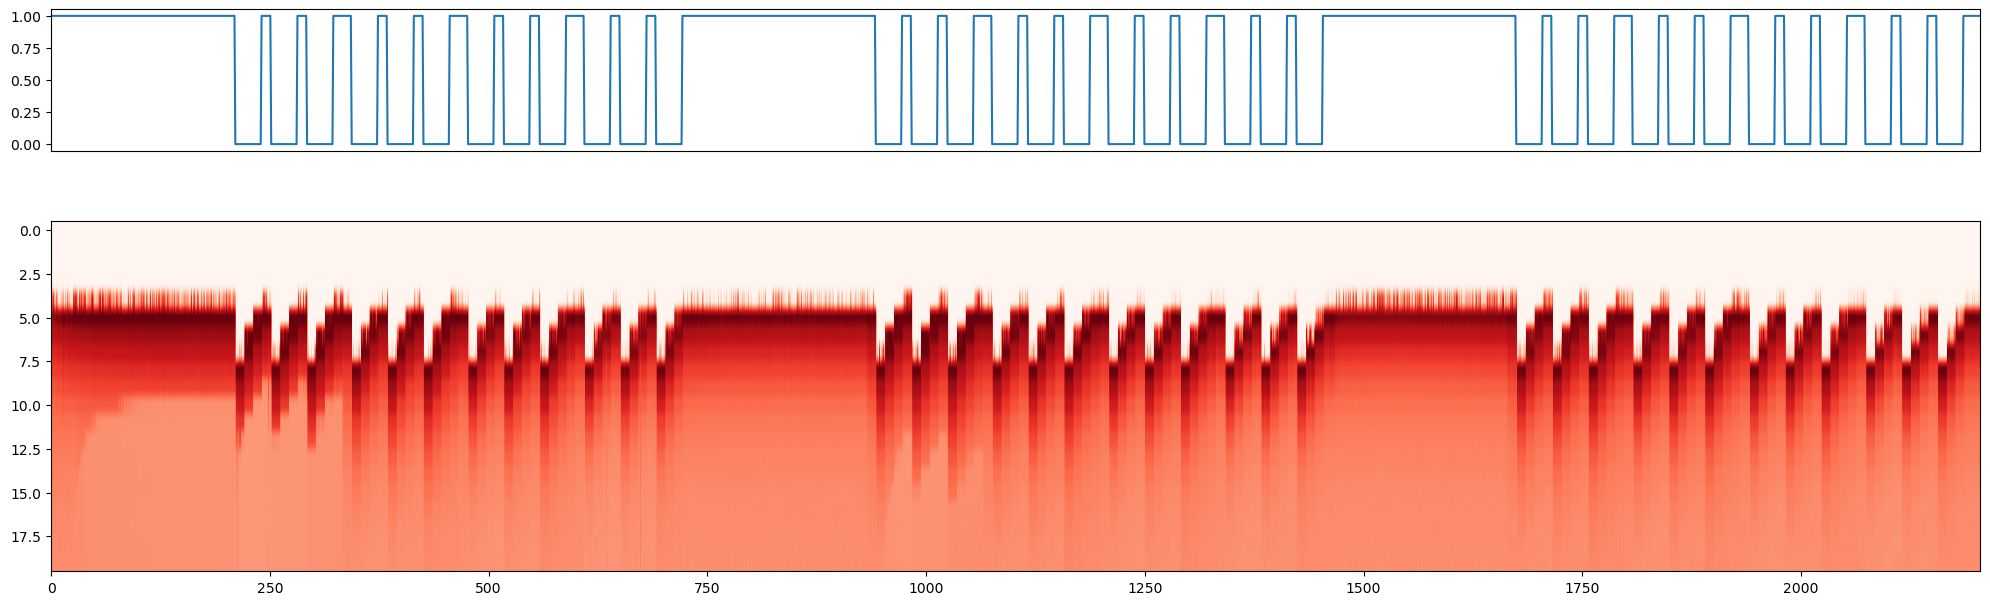

In [102]:
fig, axs = plt.subplots(nrows=2, ncols=1, height_ratios=[1, 4], figsize=(20, 7))

axs[1].imshow(FS1.iloc[:, 90:110].T, cmap='Reds', aspect=20)

axs[0].plot(y)
axs[0].set_xlim(0, y.size)
axs[0].get_xaxis().set_visible(False)

fig.tight_layout()

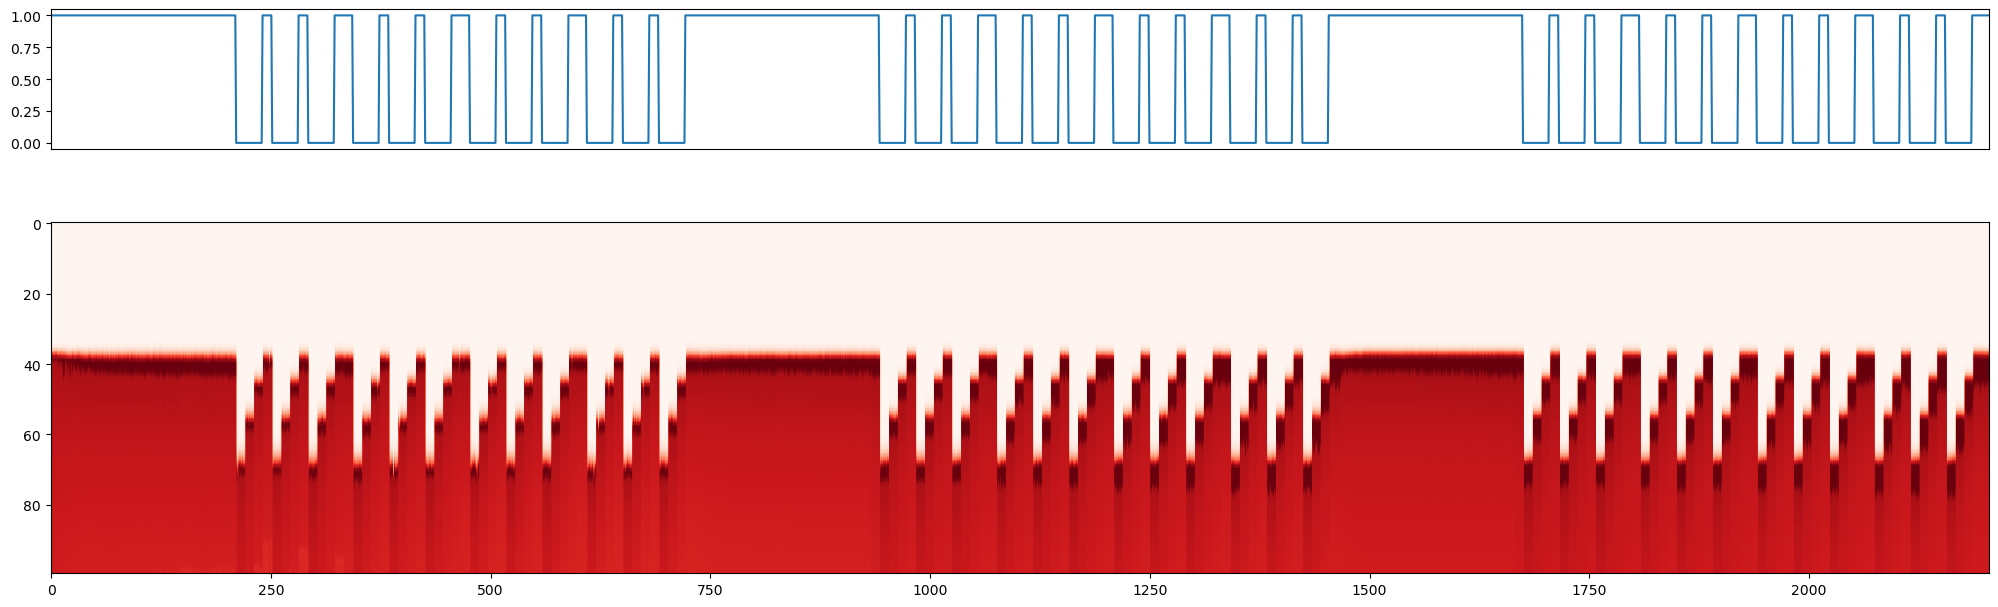

In [97]:
fig, axs = plt.subplots(nrows=2, ncols=1, height_ratios=[1, 4], figsize=(20, 7))

axs[1].imshow(PS2.iloc[:, 900:1000].T, cmap='Reds', aspect=4)

axs[0].plot(y)
axs[0].set_xlim(0, y.size)
axs[0].get_xaxis().set_visible(False)

fig.tight_layout()

# Preliminary conclusions

1. Classification problem on balanced dataset.
1. Haven't noticed any difference in FS1 and PS2 between target=1 and target=0.
1. There are much more features (6600) than examples (2000).